In [17]:
import pygrib
import numpy as np
from numpy import fft
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [18]:
#radius of earth
R = 6370
#latitude of "hurricane"
lat = 30
#distance around the hemisphere
dist = R * np.cos(30*np.pi/180.)*2*np.pi
print(dist)
#use ecmwf 1280 wavenumbers
k = 1280

#wavelength  of 1280th wave
res = (360/k)* dist
print(res)

34661.70585051591
9748.6047704576


In [19]:
# discrete resolution is 0.1 deg longitude
li = 0.1
lon = np.arange(0,360,li)
#nlon= number of longitudes
nlon = lon.shape[0]
print(nlon)
#central pressure of hurricane
cp = 940
#pressure everywhere outside hurricane
ep = 1000
#longitude of hurricane
cl = 270.
# hurricane over width of 2*hwid in degrees longitude
hwid = 4
kh = 360/(4*hwid)

#west and east edges of hurricane
wli = int((cl-hwid)/li)
eli = int((cl+hwid)/li+1)

#create pressure array
p = np.empty_like(lon)
p = ep+(cp-ep)*np.cos(np.pi*(lon-cl)*kh/180)
p[:wli]=ep
p[eli:]=ep
pmean = np.mean(p)
print(pmean)

3600
999.1512827227252


In [20]:
#compute amplitudes for each wavenumber 
Fk = fft.rfft(p) # Fourier coefficients
#recompute the pressure using all coefficients
po = fft.irfft(Fk)


#some other ways to slice and dice
#Fkr = np.real(Fk)
#Fkz[0:nq] = 0
#find the largest 10 amplitudes and their wavenumbers
#F_ind = np.argpartition(np.abs(Fkr), -50)[-50:]
#print(F_ind)
#print(Fkr[F_ind])
#Fkz[F_ind]= Fkr[F_ind]

In [21]:
#pz = np.zeros(nlon)
#pz = fft.irfft(Fkz)

#fig, (ax1) = plt.subplots(1,1,figsize=(10,16))
#ax1.plot(lon,pz)
#plt.show()

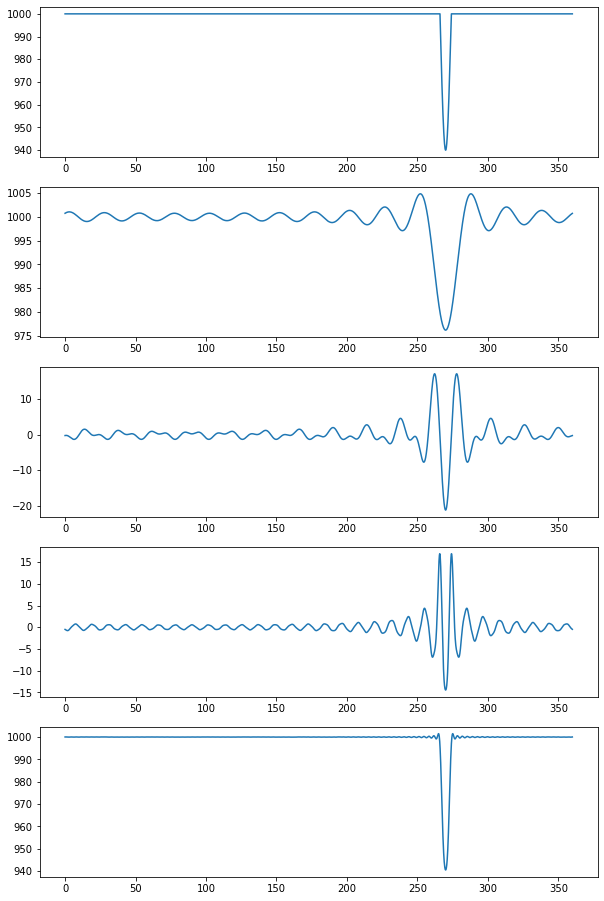

In [22]:
#nyquist wavenumber is lon/2
nq = 1800
pt = np.zeros(nlon)

#low wavenumbers
Fkl=Fk
low = range(15,nq)
Fkl[low] = 0
#pl has waves 0-15
pl = fft.irfft(Fkl)

#remove low wavenumbers 0-15
p = p-pl
Fk = fft.rfft(p) # Fourier coefficients
med = range(31,nq)
Fkm=Fk
Fkm[med] = 0
#pm has waves 16-31
pm = fft.irfft(Fkm)

#remove wavenumbers 0-30
p = p - pm
Fk = fft.rfft(p) # Fourier coefficients
hi = range(101,nq)
Fkh=Fk
Fkh[hi] = 0
#ph has waves 31-100
ph = fft.irfft(Fkh)

#add the contributions back in for waves 0-100
pt = pl+pm+ph

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10,16))
#top is the entire pressure signal
ax1.plot(lon,po)
#waves 0-15
ax2.plot(lon,pl)
#waves 16-30
ax3.plot(lon,pm)
#waves 31-100
ax4.plot(lon,ph)
# waves 0-100
ax5.plot(lon,pt)
plt.show()
    

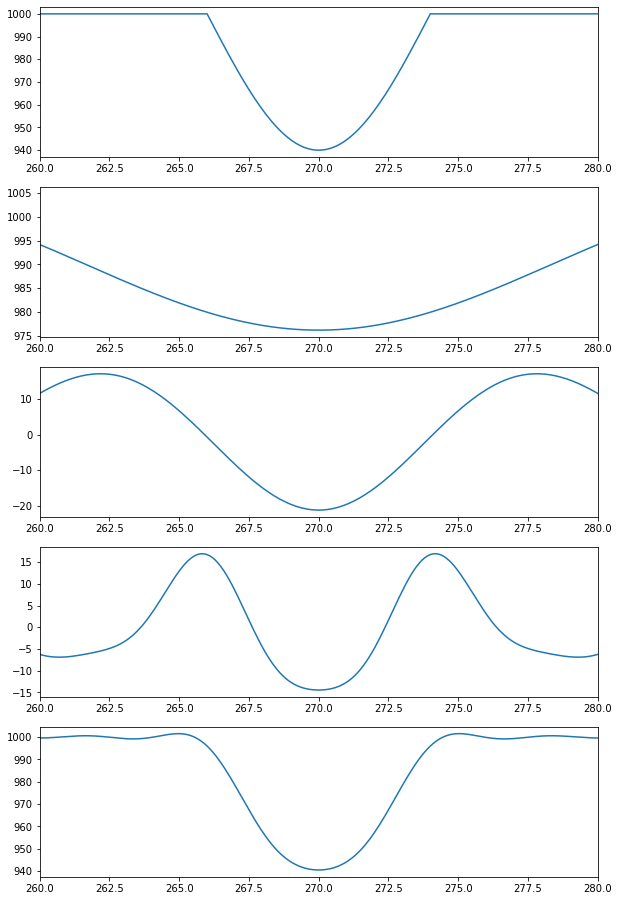

In [23]:
#look at only 260-280
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10,16))
ax1.set_xlim(260,280)
ax1.plot(lon,po)
ax2.set_xlim(260,280)
ax2.plot(lon,pl)
ax3.set_xlim(260,280)
ax3.plot(lon,pm)
ax4.set_xlim(260,280)
ax4.plot(lon,ph)
ax5.set_xlim(260,280)
ax5.plot(lon,pt)
plt.show()
    